In [1]:
!git clone https://github.com/Kei0501/LincSpectr

Cloning into 'LincSpectr'...
remote: Enumerating objects: 334, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (158/158), done.
remote: Total 334 (delta 96), reused 0 (delta 0), pack-reused 166
Receiving objects: 100% (334/334), 1.92 MiB | 14.59 MiB/s, done.
Resolving deltas: 100% (200/200), done.


# Installation

In [3]:
!pip install scanpy==1.9.6 ssqueezepy==0.6.4 pynwb==2.5.0 torch==1.13.0 matplotlib==3.5.1 anndata==0.8.0 seaborn==0.11.2

# Import packages

In [1]:
import numpy as np
import random
import torch
import umap
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

import utils
import modules

# Load data and preprocessing
LincSpectr requires single-cell transcriptome data and CWT transformed electrophysiological data. Transcriptome data were processed in workflow.py.
CWT transformed electrophysiological data were saved in npy format files.(This operation may take several hours.)

In [ ]:
#prepare electrophysiological data
file_names = utils.collect_filename("./000008/*")
cell_list = utils.collect_cellname(file_names)
utils.transform_efeatures(file_names, "./data_for_VAE/",cell_list)

# Training model
LincSpectr trains three models and estimates electrophysiological features from transcriptomic features.

In [3]:
import workflow

/Users/kei/miniconda3/envs/scanpy/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: dlopen(/Users/kei/miniconda3/envs/scanpy/lib/python3.10/site-packages/torchvision/image.so, 6): Symbol not found: __ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIxEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  Referenced from: /Users/kei/miniconda3/envs/scanpy/lib/python3.10/site-packages/torchvision/image.so
  Expected in: /Users/kei/miniconda3/envs/scanpy/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib
 in /Users/kei/miniconda3/envs/scanpy/lib/python3.10/site-packages/torchvision/image.so
  warn(f"Failed to load image Python extension: {e}")
  0%|          | 1/350 [00:00<05:23,  1.08it/s]

loss at epoch 0 is 83153192.0


  3%|▎         | 11/350 [00:04<02:05,  2.71it/s]

loss at epoch 10 is 55887700.0


  6%|▌         | 21/350 [00:08<01:58,  2.78it/s]

loss at epoch 20 is 49248588.0


  9%|▉         | 31/350 [00:11<01:52,  2.83it/s]

loss at epoch 30 is 45476924.0


 12%|█▏        | 41/350 [00:15<02:08,  2.40it/s]

loss at epoch 40 is 42880512.0


 15%|█▍        | 51/350 [00:19<01:56,  2.56it/s]

loss at epoch 50 is 40960060.0


 17%|█▋        | 61/350 [00:23<01:53,  2.55it/s]

loss at epoch 60 is 39389908.0


 20%|██        | 71/350 [00:27<01:47,  2.59it/s]

loss at epoch 70 is 37874792.0


 23%|██▎       | 81/350 [00:30<01:41,  2.65it/s]

loss at epoch 80 is 37253032.0


 26%|██▌       | 91/350 [00:34<01:38,  2.64it/s]

loss at epoch 90 is 35591652.0


 29%|██▉       | 101/350 [00:38<01:37,  2.55it/s]

loss at epoch 100 is 34493556.0


 32%|███▏      | 111/350 [00:42<01:34,  2.52it/s]

loss at epoch 110 is 33503732.0


 35%|███▍      | 121/350 [00:46<01:30,  2.52it/s]

loss at epoch 120 is 32803868.0


 37%|███▋      | 131/350 [00:50<01:27,  2.51it/s]

loss at epoch 130 is 32312702.0


 40%|████      | 141/350 [00:54<01:21,  2.57it/s]

loss at epoch 140 is 31562418.0


 43%|████▎     | 151/350 [00:58<01:18,  2.52it/s]

loss at epoch 150 is 31116242.0


 46%|████▌     | 161/350 [01:02<01:20,  2.34it/s]

loss at epoch 160 is 30498512.0


 49%|████▉     | 171/350 [01:06<01:13,  2.43it/s]

loss at epoch 170 is 30282860.0


 52%|█████▏    | 181/350 [01:10<01:14,  2.27it/s]

loss at epoch 180 is 29866588.0


 55%|█████▍    | 191/350 [01:15<01:06,  2.41it/s]

loss at epoch 190 is 29609502.0


 57%|█████▋    | 201/350 [01:19<01:01,  2.42it/s]

loss at epoch 200 is 29351404.0


 60%|██████    | 211/350 [01:23<00:56,  2.46it/s]

loss at epoch 210 is 29291016.0


 63%|██████▎   | 221/350 [01:27<00:50,  2.54it/s]

loss at epoch 220 is 29152570.0


 66%|██████▌   | 231/350 [01:31<00:42,  2.79it/s]

loss at epoch 230 is 28740118.0


 69%|██████▉   | 241/350 [01:34<00:41,  2.60it/s]

loss at epoch 240 is 28339766.0


 72%|███████▏  | 251/350 [01:38<00:39,  2.53it/s]

loss at epoch 250 is 28333750.0


 75%|███████▍  | 261/350 [01:42<00:33,  2.65it/s]

loss at epoch 260 is 28043984.0


 77%|███████▋  | 271/350 [01:46<00:30,  2.62it/s]

loss at epoch 270 is 27870280.0


 80%|████████  | 281/350 [01:50<00:26,  2.60it/s]

loss at epoch 280 is 27846052.0


 83%|████████▎ | 291/350 [01:54<00:22,  2.61it/s]

loss at epoch 290 is 27591624.0


 86%|████████▌ | 301/350 [01:58<00:18,  2.63it/s]

loss at epoch 300 is 27505162.0


 89%|████████▉ | 311/350 [02:01<00:15,  2.59it/s]

loss at epoch 310 is 27354524.0


 92%|█████████▏| 321/350 [02:05<00:10,  2.79it/s]

loss at epoch 320 is 27262274.0


 95%|█████████▍| 331/350 [02:09<00:06,  2.80it/s]

loss at epoch 330 is 27010178.0


 97%|█████████▋| 341/350 [02:12<00:03,  2.78it/s]

loss at epoch 340 is 27165600.0


  0%|          | 1/300 [00:10<50:55, 10.22s/it]

loss at epoch 0 is 2942687.25


  4%|▎         | 11/300 [01:57<52:46, 10.96s/it]

loss at epoch 10 is 2484974.75


  7%|▋         | 21/300 [03:41<49:37, 10.67s/it]

loss at epoch 20 is 2428307.5


 10%|█         | 31/300 [05:35<50:25, 11.25s/it]

loss at epoch 30 is 2396854.0


 14%|█▎        | 41/300 [07:32<49:56, 11.57s/it]

loss at epoch 40 is 2368738.5


 17%|█▋        | 51/300 [09:17<41:51, 10.09s/it]

loss at epoch 50 is 2345396.75


 20%|██        | 61/300 [10:55<39:32,  9.93s/it]

loss at epoch 60 is 2337513.25


 24%|██▎       | 71/300 [12:39<40:16, 10.55s/it]

loss at epoch 70 is 2327712.5


 27%|██▋       | 81/300 [14:28<41:00, 11.24s/it]

loss at epoch 80 is 2318475.5


 30%|███       | 91/300 [16:10<35:02, 10.06s/it]

loss at epoch 90 is 2319280.0


 34%|███▎      | 101/300 [17:52<34:17, 10.34s/it]

loss at epoch 100 is 2316646.25


 37%|███▋      | 111/300 [19:38<33:50, 10.74s/it]

loss at epoch 110 is 2320551.25


 40%|████      | 121/300 [21:23<31:43, 10.63s/it]

loss at epoch 120 is 2320784.0


 44%|████▎     | 131/300 [23:13<31:50, 11.30s/it]

loss at epoch 130 is 2320004.5


 47%|████▋     | 141/300 [25:01<29:11, 11.01s/it]

loss at epoch 140 is 2319946.5


 50%|█████     | 151/300 [26:52<27:35, 11.11s/it]

loss at epoch 150 is 2317938.5


 54%|█████▎    | 161/300 [28:39<25:02, 10.81s/it]

loss at epoch 160 is 2317132.25


 57%|█████▋    | 171/300 [30:32<24:01, 11.17s/it]

loss at epoch 170 is 2319322.0


 60%|██████    | 181/300 [32:15<19:41,  9.93s/it]

loss at epoch 180 is 2327158.25


 64%|██████▎   | 191/300 [34:02<19:36, 10.80s/it]

loss at epoch 190 is 2328626.5


 67%|██████▋   | 201/300 [35:49<17:59, 10.90s/it]

loss at epoch 200 is 2325200.25


 70%|███████   | 211/300 [37:36<15:56, 10.75s/it]

loss at epoch 210 is 2330519.5


 74%|███████▎  | 221/300 [39:26<14:21, 10.90s/it]

loss at epoch 220 is 2326426.75


 77%|███████▋  | 231/300 [41:10<11:53, 10.34s/it]

loss at epoch 230 is 2332924.5


 80%|████████  | 241/300 [43:03<11:21, 11.54s/it]

loss at epoch 240 is 2336508.0


 84%|████████▎ | 251/300 [45:02<09:40, 11.84s/it]

loss at epoch 250 is 2339981.0


 87%|████████▋ | 261/300 [46:56<07:22, 11.35s/it]

loss at epoch 260 is 2343734.0


 90%|█████████ | 271/300 [48:49<05:25, 11.21s/it]

loss at epoch 270 is 2345676.75


 94%|█████████▎| 281/300 [50:37<03:26, 10.89s/it]

loss at epoch 280 is 2342037.5


 97%|█████████▋| 291/300 [52:18<01:31, 10.13s/it]

loss at epoch 290 is 2344381.5


  0%|          | 1/350 [00:08<51:21,  8.83s/it]

loss at epoch 0 is 1555.447509765625


  3%|▎         | 11/350 [01:40<50:36,  8.96s/it]

loss at epoch 10 is 1466.7647705078125


  6%|▌         | 21/350 [03:09<50:13,  9.16s/it]

loss at epoch 20 is 1383.21875


  9%|▉         | 31/350 [04:41<50:52,  9.57s/it]

loss at epoch 30 is 1304.13916015625


 12%|█▏        | 41/350 [06:16<48:55,  9.50s/it]

loss at epoch 40 is 1229.228759765625


 15%|█▍        | 51/350 [07:45<43:09,  8.66s/it]

loss at epoch 50 is 1157.6744384765625


 17%|█▋        | 61/350 [09:18<47:07,  9.78s/it]

loss at epoch 60 is 1090.8355712890625


 20%|██        | 71/350 [10:56<43:56,  9.45s/it]

loss at epoch 70 is 1028.1614990234375


 23%|██▎       | 81/350 [12:30<43:37,  9.73s/it]

loss at epoch 80 is 969.121826171875


 26%|██▌       | 91/350 [14:04<38:14,  8.86s/it]

loss at epoch 90 is 915.1029052734375


 29%|██▉       | 101/350 [15:29<35:17,  8.50s/it]

loss at epoch 100 is 865.0667724609375


 32%|███▏      | 111/350 [16:54<33:47,  8.48s/it]

loss at epoch 110 is 819.558349609375


 35%|███▍      | 121/350 [18:20<32:35,  8.54s/it]

loss at epoch 120 is 778.585205078125


 37%|███▋      | 131/350 [19:45<30:51,  8.45s/it]

loss at epoch 130 is 742.31005859375


 40%|████      | 141/350 [21:09<29:23,  8.44s/it]

loss at epoch 140 is 710.549560546875


 43%|████▎     | 151/350 [22:34<28:28,  8.59s/it]

loss at epoch 150 is 682.982666015625


 46%|████▌     | 161/350 [23:59<26:26,  8.39s/it]

loss at epoch 160 is 659.2297973632812


 49%|████▉     | 171/350 [25:24<25:14,  8.46s/it]

loss at epoch 170 is 638.892578125


 52%|█████▏    | 181/350 [26:49<23:36,  8.38s/it]

loss at epoch 180 is 621.55859375


 55%|█████▍    | 191/350 [28:13<22:25,  8.46s/it]

loss at epoch 190 is 606.868896484375


 57%|█████▋    | 201/350 [29:38<21:05,  8.49s/it]

loss at epoch 200 is 594.40478515625


 60%|██████    | 211/350 [31:03<19:36,  8.47s/it]

loss at epoch 210 is 583.8147583007812


 63%|██████▎   | 221/350 [32:27<18:11,  8.46s/it]

loss at epoch 220 is 574.7922973632812


 66%|██████▌   | 231/350 [33:52<16:46,  8.46s/it]

loss at epoch 230 is 567.010498046875


 69%|██████▉   | 241/350 [35:17<15:24,  8.48s/it]

loss at epoch 240 is 560.3004760742188


 72%|███████▏  | 251/350 [36:41<13:57,  8.46s/it]

loss at epoch 250 is 554.5066528320312


 75%|███████▍  | 261/350 [38:09<12:48,  8.63s/it]

loss at epoch 260 is 549.432373046875


 77%|███████▋  | 271/350 [39:35<11:20,  8.61s/it]

loss at epoch 270 is 545.01025390625


 80%|████████  | 281/350 [41:01<09:55,  8.63s/it]

loss at epoch 280 is 541.1098022460938


 83%|████████▎ | 291/350 [42:27<08:27,  8.60s/it]

loss at epoch 290 is 537.6549682617188


 86%|████████▌ | 301/350 [43:53<07:00,  8.58s/it]

loss at epoch 300 is 534.5579833984375


 89%|████████▉ | 311/350 [45:19<05:37,  8.66s/it]

loss at epoch 310 is 531.8798828125


 92%|█████████▏| 321/350 [46:45<04:09,  8.60s/it]

loss at epoch 320 is 529.4886474609375


 95%|█████████▍| 331/350 [48:11<02:43,  8.60s/it]

loss at epoch 330 is 527.365234375


 97%|█████████▋| 341/350 [49:38<01:18,  8.77s/it]

loss at epoch 340 is 525.47509765625


100%|██████████| 350/350 [50:54<00:00,  8.73s/it]


In [4]:
#import the models
t_vae = workflow.t_vae
e_vae = workflow.e_vae
linkz_model = workflow.linkz_model

# Visualization of latent spaces

### UMAP representation of tVAE latent space

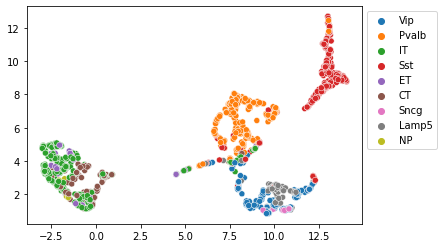

In [82]:
t_test, e_test = [], []
for i in range(len(workflow.dataset)):
    t_test.append(workflow.dataset[i][0])
    e_test.append(workflow.dataset[i][1])
test_x = torch.stack(t_test, dim = 0)
test_xcell_id = torch.stack(e_test, dim = 0)
test_x = test_x.to(workflow.device)
test_xcell_id = test_xcell_id.to(workflow.device)

t_vae.to(workflow.device)
with torch.no_grad():
    t_vae.eval()
    tz, qz, xld = t_vae(test_x)

reducer = umap.UMAP(n_neighbors=15,min_dist=0.01)
embedding = reducer.fit_transform(tz.cpu().detach().numpy())

sns.scatterplot(x = embedding[:,0],y = embedding[:,1],hue=workflow.adata.obs['RNA family'])
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))

### UMAP representation of eVAE latent space

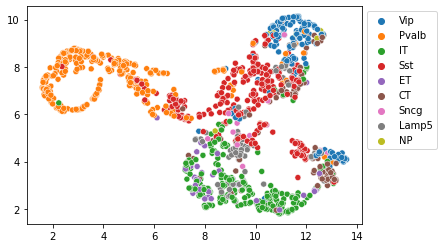

In [83]:
e_vae.to(workflow.device)
with torch.no_grad():
    e_vae.eval()
    ez, qz, ld_img = e_vae(test_xcell_id.view(-1,workflow.set_timeax*workflow.set_freqax))
reducer = umap.UMAP(n_neighbors=15,min_dist=0.1)
embedding = reducer.fit_transform(ez.cpu().detach().numpy())

sns.scatterplot(x = embedding[:,0],y = embedding[:,1],hue=workflow.adata.obs['RNA family'])
plt.legend(loc='upper left',bbox_to_anchor=(1.0,1.0))

# Estimate e-features from t-features

Display the real data and predicted data for 2 cells randomly selected from the validation dataset.

In [7]:
# load the LincSpectr model
incSpectr = modules.LincSpectr

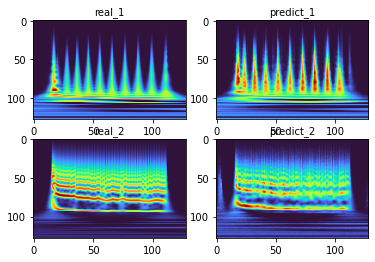

In [17]:
rand_num = random.randrange(len(workflow.valid_list))
cell_name1 = workflow.valid_list[rand_num]
rand_num = random.randrange(len(workflow.valid_list))
cell_name2 = workflow.valid_list[rand_num]
sample_data = "./data_for_VAE/20171204_sample_2.npy"
utils.show_prediction(sample_data,cell_name1, cell_name2,workflow.adata,LincSpectr,t_vae,e_vae,linkz_model,workflow.val_ez_train,workflow.val_ez)

# Inverse analysis of the model

In [84]:
#Inverse analysis of the average Pvalb cell
avr_express = utils.average_expression(workflow.adata,workflow.count_mat,"Pvalb")
image_shape = (workflow.set_timeax,workflow.set_freqax)
u_pick, top_genes, top_expression = utils.inverse_analysis(avr_express,workflow.adata,LincSpectr,t_vae,e_vae,linkz_model,workflow.val_ez_train,workflow.val_ez,N=50, image_shape=image_shape)

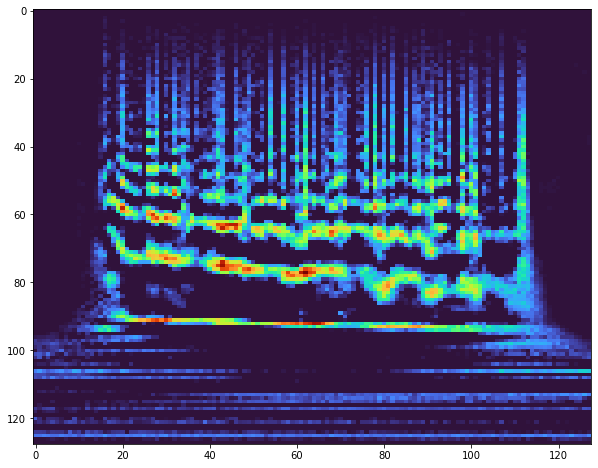

In [85]:
u_pick = u_pick.reshape(np.load(sample_data).shape)
upick_image = u_pick.to('cpu').detach().numpy().copy()
plt.figure(figsize=(10,8))
plt.imshow(upick_image, aspect='auto', cmap='turbo', vmin=0)

The genes with large singular values included in the top 10 are shown in the bar graph.

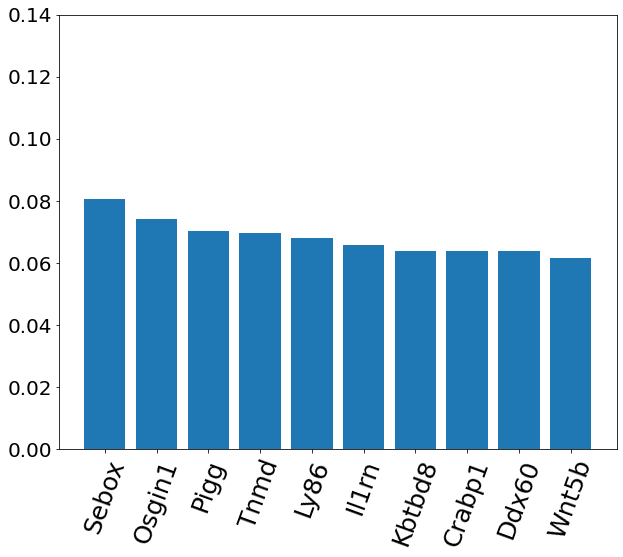

In [86]:
ten_genes = top_genes[:10]
ten_expression = top_expression[:10]
plt.figure(figsize=(10,8))
plt.bar(ten_genes,ten_expression)
plt.xticks(rotation=70,size=25)
plt.yticks(size=20)
plt.ylim(0,0.14)
plt.show()

In [87]:
for g in top_genes:
    print(g)

Sebox
Osgin1
Pigg
Tnmd
Ly86
Il1rn
Kbtbd8
Crabp1
Ddx60
Wnt5b
Btk
Tnc
Igsf6
Glra2
Gm33148
2310002F09Rik
Tbata
D030056L22Rik
Gpr6
Ankrd34c
Atp13a4
Pdgfra
Rgs1
Traf1
Lsp1
Lcp1
Il12b
Zscan12
Anxa3
Aplf
Nqo2
Ecel1
Tmem100
Tpbg
Egfr
Casp8
Aldh1a1
Prim1
Gimap6
Ikbip
Dock8
Zfp185
Ankef1
Elf3
Cela1
Ermn
Zfp11
Mirt1
Prps2
Col24a1
